<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/CiFar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

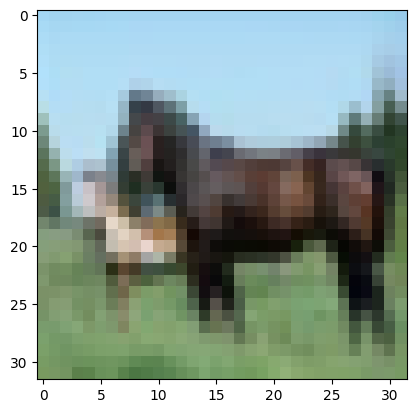

In [13]:
plt.imshow(x_train[12])

In [14]:
x_train = x_train/255

In [15]:
x_test = x_test/255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train,num_classes =10)

In [19]:
y_cat_test = to_categorical(y_test,num_classes =10)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters =32,kernel_size =(4,4),input_shape =(32,32,3),activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters =32,kernel_size =(4,4),input_shape =(32,32,3),activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Flatten())

model.add(Dense(256,activation ='relu'))

model.add(Dense(10,activation ='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience =2)

In [24]:
model.fit(x_train,y_cat_train,epochs =15,validation_data =(x_test,y_cat_test),callbacks =[early_stop])

Epoch 1/15
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5040 - accuracy: 0.4562 - val_loss: 1.3066 - val_accuracy: 0.5403
Epoch 2/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1611 - accuracy: 0.5909 - val_loss: 1.1554 - val_accuracy: 0.5882
Epoch 3/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0230 - accuracy: 0.6428 - val_loss: 1.0350 - val_accuracy: 0.6385
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9181 - accuracy: 0.6801 - val_loss: 0.9691 - val_accuracy: 0.6645
Epoch 5/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8333 - accuracy: 0.7077 - val_loss: 0.9606 - val_accuracy: 0.6655
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7593 - accuracy: 0.7342 - val_loss: 0.9625 - val_accuracy: 0.6702
Epoch 7/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6890 - accuracy: 0.7596 - val_loss: 0.9669 -

In [26]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

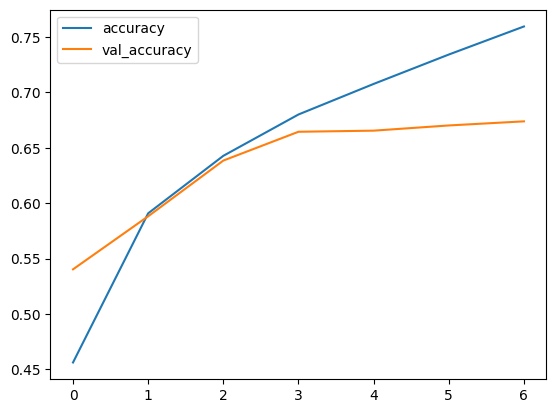

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

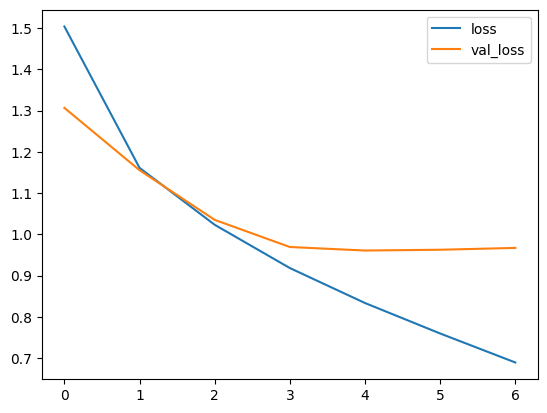

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9669 - accuracy: 0.6739


[0.9669264554977417, 0.6739000082015991]

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
import tensorflow as tf
predictions = tf.argmax(model.predict(x_test),axis =1)

313/313 [==============================] - 5s 16ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.84      0.72      0.78      1000
           2       0.61      0.56      0.58      1000
           3       0.47      0.53      0.50      1000
           4       0.60      0.66      0.63      1000
           5       0.61      0.51      0.55      1000
           6       0.71      0.78      0.74      1000
           7       0.72      0.73      0.72      1000
           8       0.84      0.69      0.76      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [38]:
print(confusion_matrix(y_test,predictions))

[[747  13  44  27  29   8  13  19  38  62]
 [ 31 717   8  14  10   6  19   5  31 159]
 [ 59   4 559  79  85  58  78  47   8  23]
 [ 20  10  55 525  81 137  84  40  10  38]
 [ 16   3  72  73 655  30  59  78  11   3]
 [  8   3  70 221  68 506  36  63   9  16]
 [  3   6  53  69  51  18 778   9   3  10]
 [ 12   0  29  52  85  47   9 730   4  32]
 [113  42  18  29  15   8   9   5 691  70]
 [ 31  52  10  20   4   8   8  23  13 831]]


<Axes: >

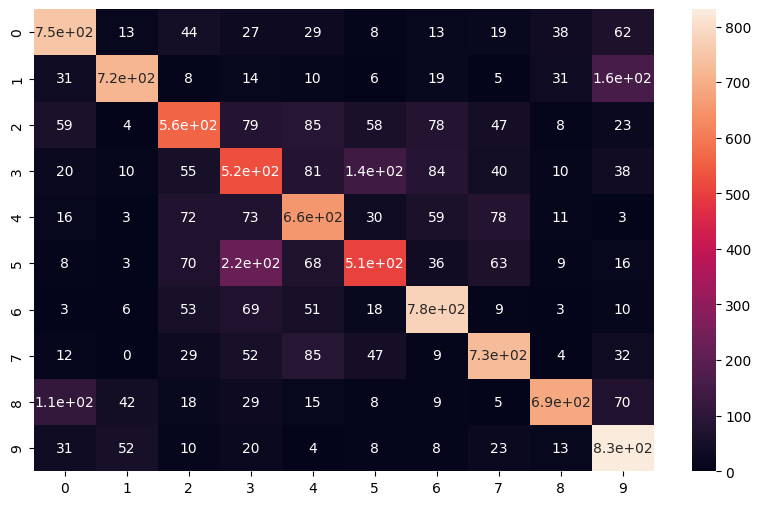

In [40]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot = True)